<a href="https://colab.research.google.com/github/Pratyush1110/Machine-Learning/blob/main/HandsOnML/Chp4/Chp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression

### The Normal Equation

$$\hat{\theta} = (X^T X)^{-1} X^T y$$

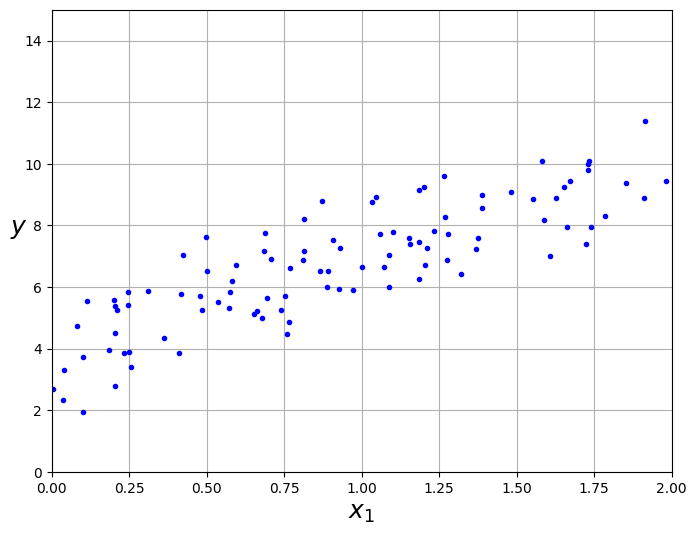

In [2]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.92844525],
       [3.05977356]])

$\theta_0 = 3.92$: The model estimated the intercept is 3.92 (very close to 4).

$\theta_1 = 2.89$: The model estimated the slope is 2.89 (very close to 3).

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92844525],
       [10.04799237]])

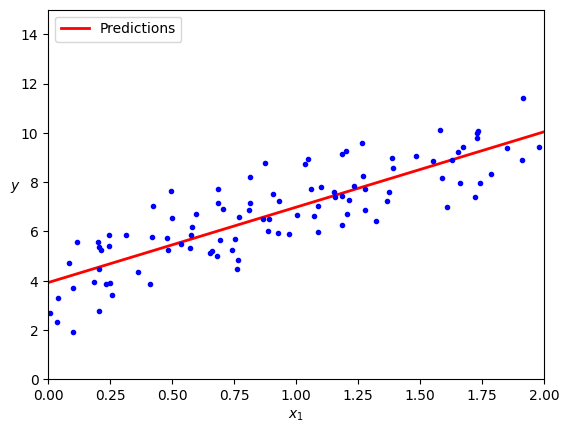

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") # "r-" is a red line
plt.plot(X, y, "b.") # The original blue dots
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regressiong using ScikitLearn

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92844525]), array([[3.05977356]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.92844525],
       [10.04799237]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.92844525],
       [3.05977356]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.92844525],
       [3.05977356]])

### Computational Complexity

1. Feature Heavy = Very Slow: Because the complexity is between $O(n^{2.4})$ and $O(n^3)$, doubling your features ($n$) makes the math roughly 5 to 8 times slower. It hits a "wall" around 100,000 features.

2. Data Heavy = Predictable: These methods are $O(m)$ (linear) regarding the number of instances ($m$). If you double the number of rows, it just takes twice as long.

3. The RAM Limit: You must be able to fit your entire dataset into memory at once. If the data is bigger than your RAM, these methods won't work.

4. SVD is the Modern Choice: Scikit-Learn uses SVD ($O(n^2)$) because it is faster and more stable than the Normal Equation, but it still struggles with massive feature sets compared to Gradient Descent.

# Gradient Descent

### Batch Gradient Descent

$$\frac{\partial}{\partial\theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)}) x_j^{(i)}$$

better written as : $$\nabla_{\theta} \text{MSE}(\theta) = \frac{2}{m} X^T (X \theta - y)$$

once we have this gradient vector, we can then use it to update our weights:$$\theta^{(\text{next step})} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta)$$

where, $$\eta$$ symbol is the learning rate.

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #calculate the slope
  theta = theta - eta * gradients                 #updae the theta

theta

array([[3.92844525],
       [3.05977356]])

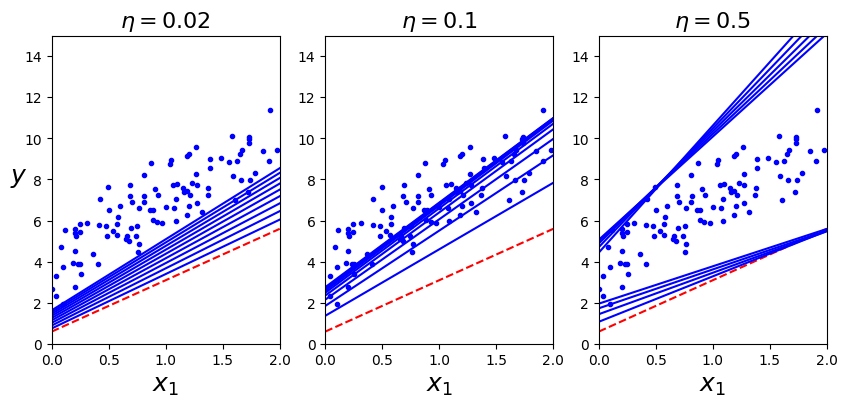

In [20]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10: # Only plot the first 10 steps to see the movement
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--" # Red dashed line for starting point
            plt.plot(X_new, y_predict, style)

        # The Gradient Descent Step
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

#3. Create the plots
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
theta_start = np.random.randn(2,1) # Start all three at the same random spot

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta_start, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta_start, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta_start, eta=0.5)

plt.show()

1. Left ($\eta = 0.02$): Too Low.Notice how the blue lines are very close together. The model is learning, but it is incredibly slow. It would take thousands of iterations to actually reach the best fit.

2. Middle ($\eta = 0.1$): Just Right.In just a few steps, the model has already converged to a line that fits the data well. This is the "Goldilocks" learning rate for this specific problem.

3. Right ($\eta = 0.5$): Too High.Look at the lines jumping all over the place! The algorithm "over-shoots" the minimum. Instead of settling at the bottom of the bowl, it bounces higher and higher up the opposite sides until it actually flies away from the data (diverges).

### Stochastic Gradient Descent (SGD)

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.93739303],
       [3.05966674]])

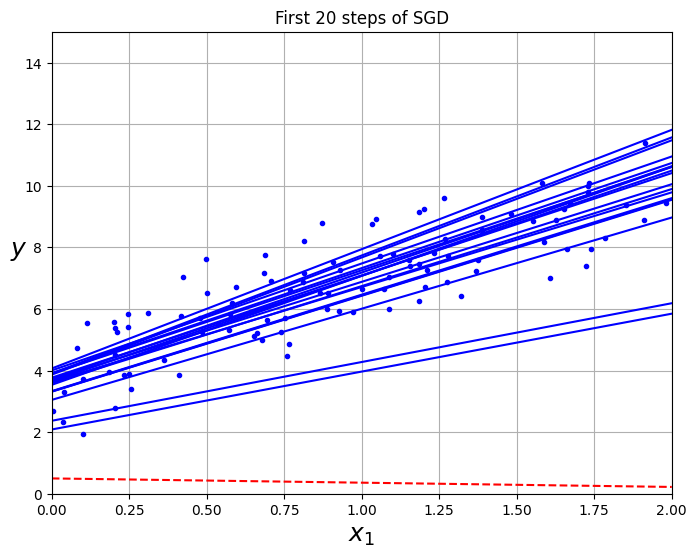

In [34]:
np.random.seed(42) # For reproducibility
theta = np.random.randn(2,1)
m = len(X_b)

plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")

for step in range(20):
    y_predict = X_new_b.dot(theta)
    style = "b-" if step > 0 else "r--"
    plt.plot(X_new, y_predict, style)

    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(step)
    theta = theta - eta * gradients

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.title("First 20 steps of SGD")
plt.show()

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.8988625]), array([3.06450012]))

### Mini-batch Gradient Descent

1. Uses Small Chunks: Instead of using the full dataset (Batch) or just one row (Stochastic), it computes gradients on small random sets of instances called mini-batches.

2. Hardware Boost: It allows for a performance boost through hardware optimization of matrix operations, specifically when using GPUs, which are great at processing small batches of data simultaneously.

3. Balanced Path: Its path to the minimum is less erratic than Stochastic GD but more "jumpy" than Batch GD, allowing it to get closer to the minimum than SGD while still being fast.

4. The "Sweet Spot": It combines the stability of Batch GD with the efficiency and memory-saving benefits of Stochastic GD, making it the most common choice for Deep Learning.

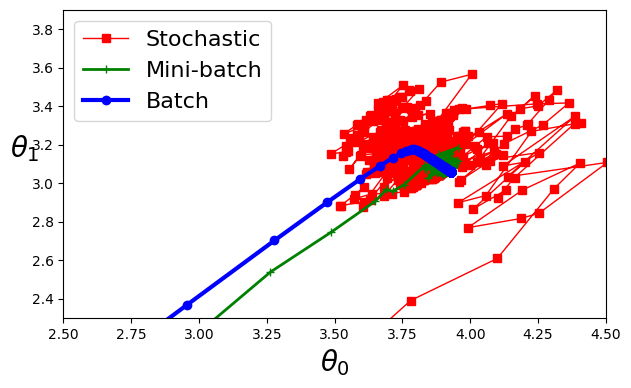

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Data and Paths
theta_path_bgd = []
theta_path_sgd = []
theta_path_mgd = []

m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # Same starting point for all

# --- Batch Gradient Descent ---
theta_bgd = theta.copy()
eta = 0.1
for iteration in range(1000):
    gradients = 2/m * X_b.T @ (X_b @ theta_bgd - y)
    theta_bgd = theta_bgd - eta * gradients
    theta_path_bgd.append(theta_bgd)

# --- Stochastic Gradient Descent ---
theta_sgd = theta.copy()
for epoch in range(n_epochs):
    for i in range(m):
        theta_path_sgd.append(theta_sgd)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients

# --- Mini-batch Gradient Descent ---
theta_mgd = theta.copy()
minibatch_size = 20
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        theta_path_mgd.append(theta_mgd)
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T @ (xi @ theta_mgd - yi)
        eta = learning_schedule(t)
        theta_mgd = theta_mgd - eta * gradients

# 2. Convert paths to numpy arrays for plotting
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# 3. Plotting
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$ ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()